In [1]:
# Important necessary libraries

#from typing import List, Tuple
import pandas as pd
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import datetime
#from scipy import signal
import warnings
import os
import seaborn as sns

#ignore warnings for the notebook
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# Set your working directory [Do not forget to make a short-cut of the folder shared by Galina to your Drive]
os.chdir('/content/drive/MyDrive/#WaterSoftHack25 - Water quality project/Project Codes/input datafiles/')

In [4]:
# Import daily data file
df = pd.read_csv('11447650_raw_daily_data_api_noProvisionalData.csv')

df.head()

,DATE,SSC_mg_L,SSD_st_d,Discharge_cfs,Precip_in,Turb_fnu
0,2009-12-03,25.0,562.0,8440.0,0.00,4.225000
1,2009-12-04,20.0,478.0,8650.0,0.00,4.405208
2,2009-12-05,14.0,334.0,8520.0,0.00,4.281053
3,2009-12-06,11.0,242.0,8250.0,0.13,4.666667
4,2009-12-07,21.0,507.0,9190.0,0.42,4.757317


In [5]:
# descriptive statistics
df.describe()

,SSC_mg_L,SSD_st_d,Discharge_cfs,Precip_in,Turb_fnu
count,4891.000000,4891.00000,4891.000000,4891.000000,4891.000000
mean,30.451646,2673.07524,19623.829483,0.048518,13.545486
std,39.271118,5584.08940,16773.258844,0.204045,22.949403
min,1.000000,20.00000,4340.000000,0.000000,0.553125
25%,10.000000,265.00000,9150.000000,0.000000,4.118854
50%,17.000000,665.00000,13800.000000,0.000000,6.653125
75%,35.000000,1900.00000,20400.000000,0.000000,12.616667
max,582.000000,52900.00000,96200.000000,5.410000,450.437500


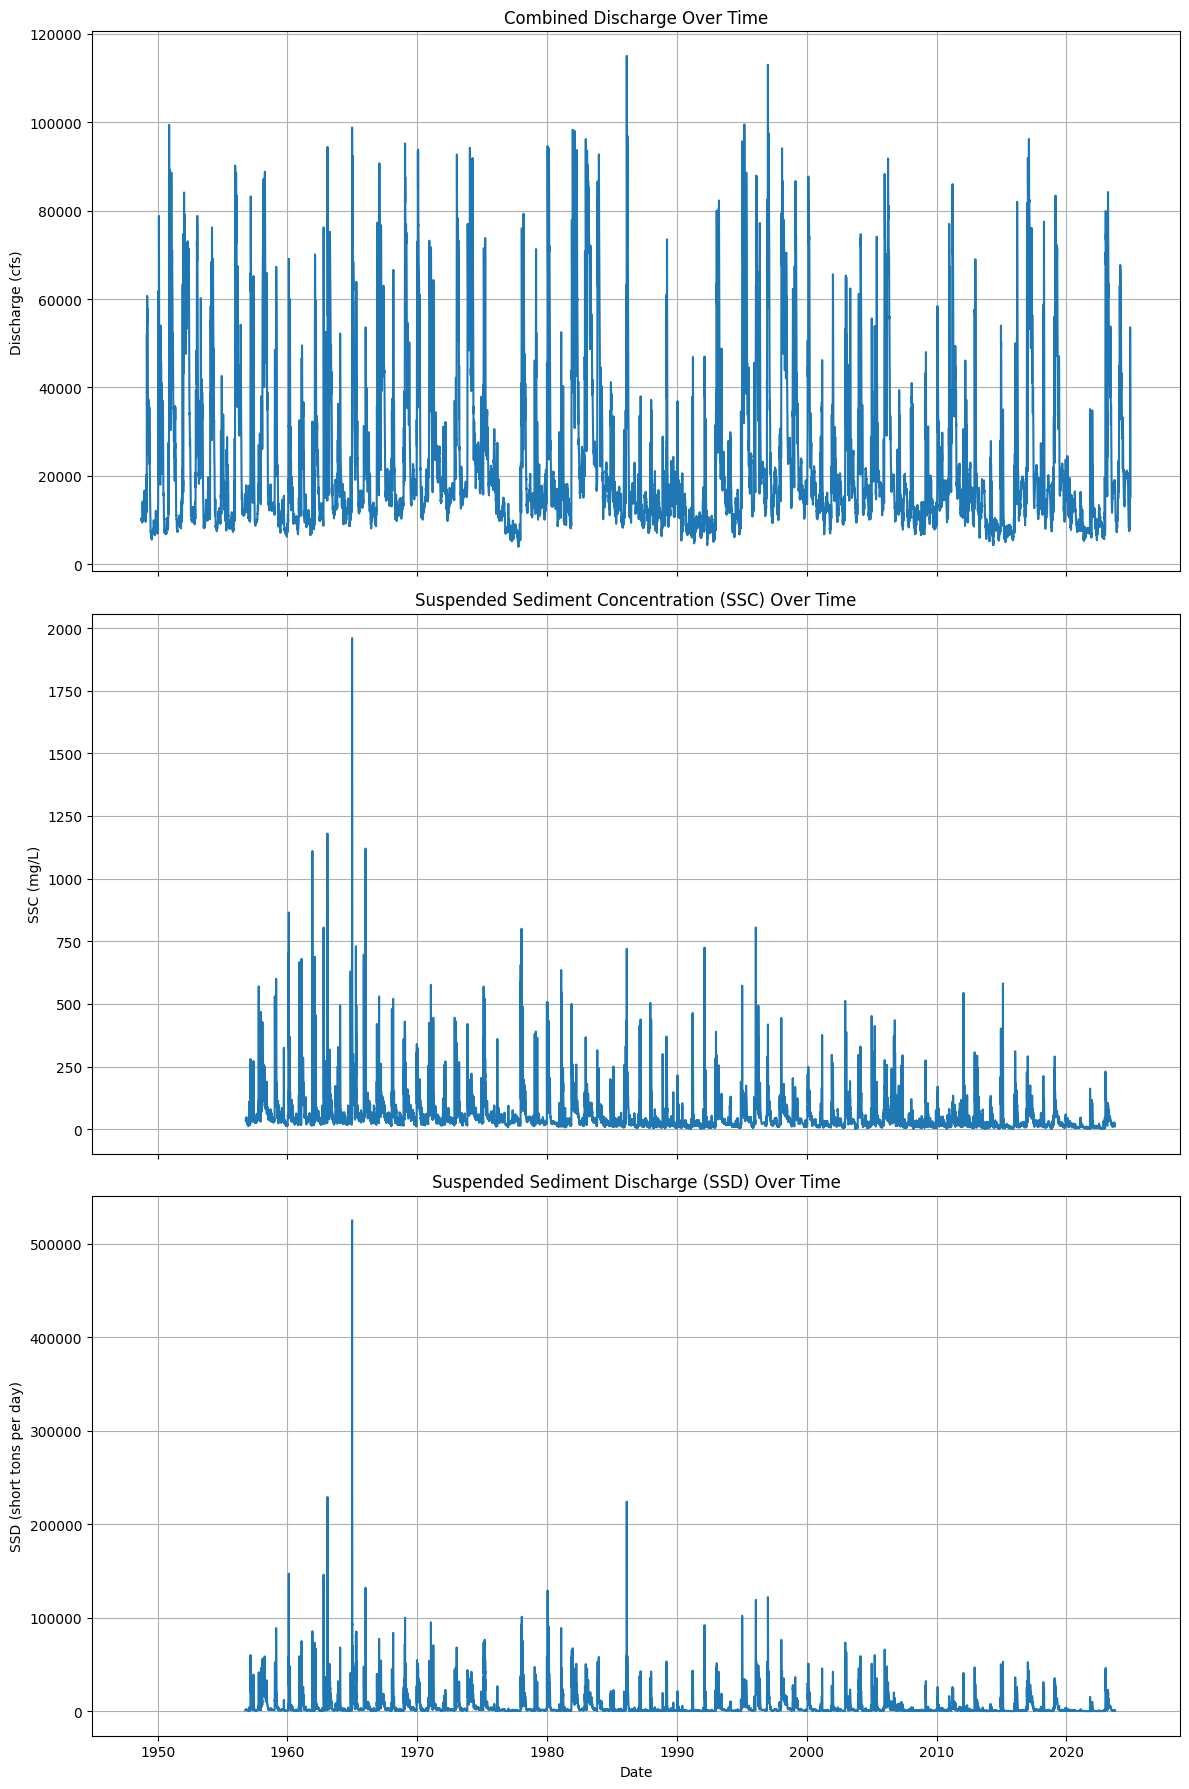

In [ ]:
# Plot time series for combined_discharge, SSC, and SSD in one figure with the same x-axis range

# Ensure the DATE column is in datetime format and set as index if not already done
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Create a figure with 3 subplots sharing the x-axis
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot combined discharge
sns.lineplot(ax=axes[0], data=df, y='discharge_combined', x=df.index)
axes[0].set_title('Combined Discharge Over Time')
axes[0].set_ylabel('Discharge (cfs)')
axes[0].grid(True)

# Plot SSC
sns.lineplot(ax=axes[1], data=df, y='SSC', x=df.index)
axes[1].set_title('Suspended Sediment Concentration (SSC) Over Time')
axes[1].set_ylabel('SSC (mg/L)')
axes[1].grid(True)

# Plot SSD
sns.lineplot(ax=axes[2], data=df, y='SSD', x=df.index)
axes[2].set_title('Suspended Sediment Discharge (SSD) Over Time')
axes[2].set_ylabel('SSD (short tons per day)')
axes[2].set_xlabel('Date')
axes[2].grid(True)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Create a subset of the DataFrame for the specified date range and selected columns
subset_df = df.loc['1956-10-15':'2023-09-30', ['SSC', 'SSD', 'discharge_combined']]

# Since 'DATE' is the index, it will be included by default when displaying the DataFrame.
# If you need 'DATE' as a regular column, you can reset the index:
# subset_df = subset_df.reset_index()


# Display the subset DataFrame
display(subset_df)

,SSC,SSD,discharge_combined
DATE,,,
1956-10-15 00:00:00+00:00,37.0,1250.0,12500.0
1956-10-16 00:00:00+00:00,NaN,1300.0,12300.0
1956-10-17 00:00:00+00:00,NaN,1450.0,12100.0
1956-10-18 00:00:00+00:00,NaN,1300.0,12200.0
1956-10-19 00:00:00+00:00,NaN,1300.0,12000.0
...,...,...,...
2023-09-25 00:00:00+00:00,16.0,806.0,18200.0
2023-09-26 00:00:00+00:00,15.0,698.0,17800.0
2023-09-27 00:00:00+00:00,13.0,619.0,17400.0


In [ ]:
print("Missing values in 'discharge_combined':", subset_df['discharge_combined'].isnull().sum())
print("Missing values in 'SSC':", subset_df['SSC'].isnull().sum())
print("Missing values in 'SSD':", subset_df['SSD'].isnull().sum())

Missing values in 'discharge_combined': 0
Missing values in 'SSC': 589
Missing values in 'SSD': 20


In [ ]:
# Function to find missing date ranges
def find_missing_date_ranges(df, column):
    missing_dates = df[df[column].isnull()].index
    if missing_dates.empty:
        return []

    ranges = []
    start_range = missing_dates[0]
    end_range = missing_dates[0]

    for date in missing_dates[1:]:
        if (date - end_range).days == 1:
            end_range = date
        else:
            # Only append if the range is longer than 1 day
            if (end_range - start_range).days > 0:
                ranges.append((start_range.strftime('%Y-%m-%d'), end_range.strftime('%Y-%m-%d')))
            start_range = date
            end_range = date

    # Check the last range
    if (end_range - start_range).days > 0:
        ranges.append((start_range.strftime('%Y-%m-%d'), end_range.strftime('%Y-%m-%d')))

    return ranges

# Find missing date ranges for SSC
missing_ssc_ranges = find_missing_date_ranges(subset_df, 'SSC')
#print("Missing date ranges for SSC (longer than 1 day):")
#for start, end in missing_ssc_ranges:
#    print(f"  {start} to {end}")

#print("\n" + "="*30 + "\n")

# Find missing date ranges for SSD
missing_ssd_ranges = find_missing_date_ranges(subset_df, 'SSD')
#print("Missing date ranges for SSD (longer than 1 day):")
#for start, end in missing_ssd_ranges:
#    print(f"  {start} to {end}")

In [ ]:
def analyze_missing_ranges(missing_ranges):
    if not missing_ranges:
        return 0, 0

    longest_gap = 0
    total_gaps_longer_than_1_day = len(missing_ranges) # Since the function already filters for > 1 day

    for start_str, end_str in missing_ranges:
        start_date = pd.to_datetime(start_str)
        end_date = pd.to_datetime(end_str)
        gap_length = (end_date - start_date).days + 1  # Add 1 to include both start and end days
        if gap_length > longest_gap:
            longest_gap = gap_length

    return longest_gap, total_gaps_longer_than_1_day

# Analyze SSC missing ranges
longest_ssc_gap, total_ssc_gaps = analyze_missing_ranges(missing_ssc_ranges)
print(f"SSC - Longest gap: {longest_ssc_gap} days, Total gaps longer than 1 day: {total_ssc_gaps}")

print("\n" + "="*30 + "\n")

# Analyze SSD missing ranges
longest_ssd_gap, total_ssd_gaps = analyze_missing_ranges(missing_ssd_ranges)
print(f"SSD - Longest gap: {longest_ssd_gap} days, Total gaps longer than 1 day: {total_ssd_gaps}")

SSC - Longest gap: 15 days, Total gaps longer than 1 day: 64


SSD - Longest gap: 15 days, Total gaps longer than 1 day: 2


In [ ]:
def find_longest_missing_range(missing_ranges):
    if not missing_ranges:
        return None

    longest_range = None
    longest_gap_length = 0

    for start_str, end_str in missing_ranges:
        start_date = pd.to_datetime(start_str)
        end_date = pd.to_datetime(end_str)
        gap_length = (end_date - start_date).days + 1

        if gap_length > longest_gap_length:
            longest_gap_length = gap_length
            longest_range = (start_str, end_str)

    return longest_range

# Find and print the longest missing range for SSC
longest_ssc_range = find_longest_missing_range(missing_ssc_ranges)
if longest_ssc_range:
    print(f"Longest missing date range for SSC: {longest_ssc_range[0]} to {longest_ssc_range[1]}")
else:
    print("No missing date ranges longer than 1 day found for SSC.")

print("\n" + "="*30 + "\n")

# Find and print the longest missing range for SSD
longest_ssd_range = find_longest_missing_range(missing_ssd_ranges)
if longest_ssd_range:
    print(f"Longest missing date range for SSD: {longest_ssd_range[0]} to {longest_ssd_range[1]}")
else:
    print("No missing date ranges longer than 1 day found for SSD.")

Longest missing date range for SSC: 1966-02-01 to 1966-02-15


Longest missing date range for SSD: 1966-02-01 to 1966-02-15


In [ ]:
# Apply linear interpolation to the 'SSC' and 'SSD' columns
subset_df_interpolated = subset_df.copy() # Create a copy to avoid modifying the original subset_df
subset_df_interpolated['SSC'] = subset_df_interpolated['SSC'].interpolate(method='linear')
subset_df_interpolated['SSD'] = subset_df_interpolated['SSD'].interpolate(method='linear')

# Display the head of the interpolated DataFrame to show the result
print("DataFrame after linear interpolation:")
display(subset_df_interpolated.head())

# You can also check the number of missing values again to confirm they have been filled
print("\nMissing values after interpolation:")
print(subset_df_interpolated.isnull().sum())

DataFrame after linear interpolation:


,SSC,SSD,discharge_combined
DATE,,,
1956-10-15 00:00:00+00:00,37.000000,1250.0,12500.0
1956-10-16 00:00:00+00:00,38.142857,1300.0,12300.0
1956-10-17 00:00:00+00:00,39.285714,1450.0,12100.0
1956-10-18 00:00:00+00:00,40.428571,1300.0,12200.0
1956-10-19 00:00:00+00:00,41.571429,1300.0,12000.0



Missing values after interpolation:
SSC                   0
SSD                   0
discharge_combined    0
dtype: int64


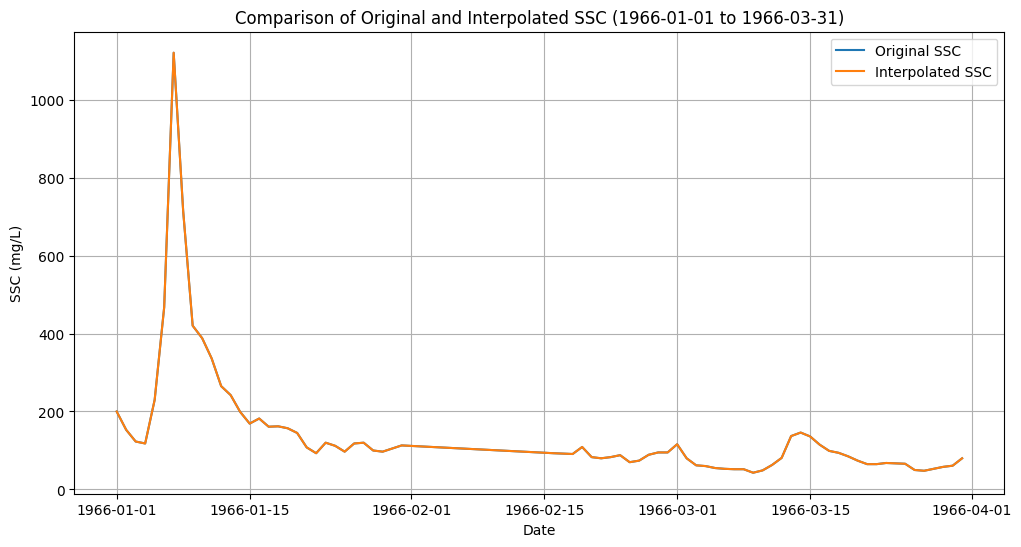

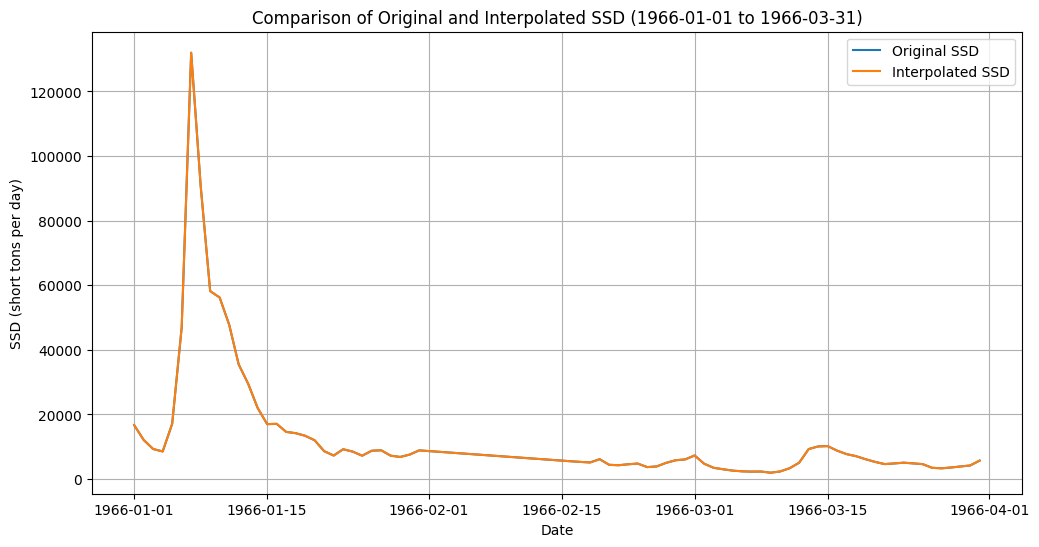

In [ ]:
# make plot of time series ~1 month before and after gap to evaluate performance

# Define the date range for comparison
start_date = '1966-01-01'
end_date = '1966-03-31'

# Create subsets for the specified date range
subset_original = subset_df.loc[start_date:end_date]
subset_interpolated = subset_df_interpolated.loc[start_date:end_date]

# Reset index to make 'DATE' a regular column for plotting
subset_original_reset = subset_original.reset_index()
subset_interpolated_reset = subset_interpolated.reset_index()


# Plot comparison for SSC
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset_original_reset, y='SSC', x='DATE', label='Original SSC') # Use the new DataFrame with 'DATE' column
sns.lineplot(data=subset_interpolated_reset, y='SSC', x='DATE', label='Interpolated SSC') # Use the new DataFrame with 'DATE' column
plt.title('Comparison of Original and Interpolated SSC (1966-01-01 to 1966-03-31)')
plt.ylabel('SSC (mg/L)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Plot comparison for SSD
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset_original_reset, y='SSD', x='DATE', label='Original SSD') # Use the new DataFrame with 'DATE' column
sns.lineplot(data=subset_interpolated_reset, y='SSD', x='DATE', label='Interpolated SSD') # Use the new DataFrame with 'DATE' column
plt.title('Comparison of Original and Interpolated SSD (1966-01-01 to 1966-03-31)')
plt.ylabel('SSD (short tons per day)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

**Ari:  Below is the output from Gemini when I asked it to create a plot of the long-term average SSC so I could compare the long-term average value with that of the interpolated values from the linear interpolation above. This is probably overkill, but I thought it couldn't hurt to know the long-term average values.**

# Task
Create a plot of the long-term average SSC calculated for each calendar day of the year for the entire SSC dataset.

## Prepare data for daily average calculation

### Subtask:
Extract the month and day from the DATE index of the original DataFrame (`df`) and store them as new columns.


**Reasoning**:
Extract the month and day from the DataFrame index and store them in new columns.



In [ ]:
df['month'] = df.index.month
df['day'] = df.index.day

## Calculate long-term daily average ssc

### Subtask:
Group the DataFrame by month and day and calculate the mean of the 'SSC' column for each group.


**Reasoning**:
Group the DataFrame by month and day and calculate the mean of the 'SSC' column for each group to get the long-term average SSC for each calendar day.



In [ ]:
daily_avg_ssc = df.groupby(['month', 'day'])['SSC'].mean()
display(daily_avg_ssc.head())

month  day
1      1      73.038462
       2      73.384375
       3      75.074242
       4      71.726562
       5      71.156061
Name: SSC, dtype: float64

## Plot long-term daily average ssc

### Subtask:
Create a plot of the calculated long-term daily average SSC across the year.


**Reasoning**:
Create a figure and axes, plot the daily average SSC, set the title and labels, add a grid, and display the plot to visualize the long-term daily average SSC.



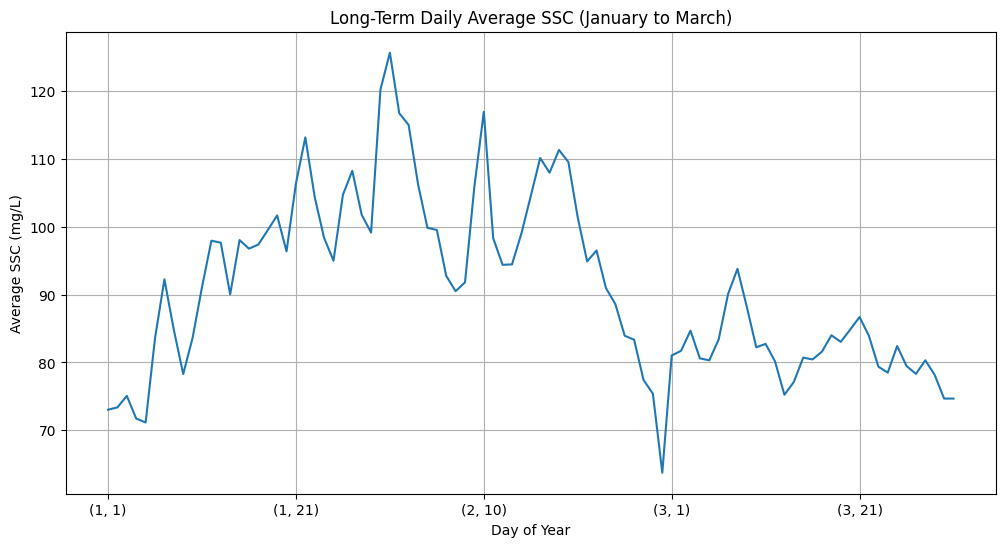

In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))

# Select data for months 1, 2, and 3 (January to March)
daily_avg_ssc.loc[[(1, d) for d in range(1, 32)] + [(2, d) for d in range(1, 30)] + [(3, d) for d in range(1, 32)]].plot(ax=axes)


axes.set_title('Long-Term Daily Average SSC (January to March)')
axes.set_ylabel('Average SSC (mg/L)')
axes.set_xlabel('Day of Year')
axes.grid(True)

plt.show()

## Summary:

### Data Analysis Key Findings

*   The long-term daily average SSC was calculated for each calendar day of the year by grouping the data by month and day and taking the mean of the 'SSC' column.
*   A plot of the long-term daily average SSC was successfully generated, showing the variation of average SSC across the year.

### Insights or Next Steps

*   Ari:  The long-term average values for the month of February are roughly between 100-120 mg/L, which is in the ballpark of what the linear interpolation method produced.


In [ ]:
# Descriptive statistics for original data
print("Descriptive statistics for original data (subset_df):")
display(subset_df[['SSC', 'SSD']].describe())

print("\n" + "="*50 + "\n")

# Descriptive statistics for interpolated data
print("Descriptive statistics for interpolated data (subset_df_interpolated):")
display(subset_df_interpolated[['SSC', 'SSD']].describe())

Descriptive statistics for original data (subset_df):


,SSC,SSD
count,23866.000000,24435.000000
mean,52.935477,5061.817270
std,69.906762,11461.934309
min,1.000000,20.000000
25%,17.625000,587.000000
50%,32.000000,1320.000000
75%,60.000000,3865.000000
max,1960.000000,525000.000000




Descriptive statistics for interpolated data (subset_df_interpolated):


,SSC,SSD
count,24455.000000,24455.000000
mean,52.819080,5062.345124
std,69.275218,11457.518872
min,1.000000,20.000000
25%,18.000000,588.000000
50%,32.000000,1320.000000
75%,60.000000,3880.000000
max,1960.000000,525000.000000


In [ ]:
# test each variable for stationarity
from statsmodels.tsa.stattools import adfuller

def run_adf_test(series, name):
    result = adfuller(series.dropna()) # Drop NaN values just in case, though interpolated data should not have them
    print(f'Augmented Dickey-Fuller Test Results for {name}:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  P-value: {result[1]}')
    print(f'  Number of Lags Used: {result[2]}')
    print(f'  Number of Observations Used For ADF Regression: {result[3]}')
    print('  Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value}')
    print('\nInterpretation:')
    if result[1] <= 0.05:
        print(f'  The p-value ({result[1]:.3f}) is less than or equal to 0.05, so we reject the null hypothesis.')
        print(f'  The time series "{name}" is likely stationary.')
    else:
        print(f'  The p-value ({result[1]:.3f}) is greater than 0.05, so we fail to reject the null hypothesis.')
        print(f'  The time series "{name}" is likely non-stationary.')
    print("-" * 30)

# Run ADF test on each variable
run_adf_test(subset_df_interpolated['SSC'], 'SSC')
run_adf_test(subset_df_interpolated['SSD'], 'SSD')
run_adf_test(subset_df_interpolated['discharge_combined'], 'discharge_combined')

Augmented Dickey-Fuller Test Results for SSC:
  Test Statistic: -13.420724570303662
  P-value: 4.194971284509027e-25
  Number of Lags Used: 48
  Number of Observations Used For ADF Regression: 24406
  Critical Values:
    1%: -3.4306179663982235
    5%: -2.861658432907857
    10%: -2.566833038396077

Interpretation:
  The p-value (0.000) is less than or equal to 0.05, so we reject the null hypothesis.
  The time series "SSC" is likely stationary.
------------------------------
Augmented Dickey-Fuller Test Results for SSD:
  Test Statistic: -14.501023426570466
  P-value: 5.932253130813795e-27
  Number of Lags Used: 46
  Number of Observations Used For ADF Regression: 24408
  Critical Values:
    1%: -3.4306179444386538
    5%: -2.8616584232028406
    10%: -2.5668330332303024

Interpretation:
  The p-value (0.000) is less than or equal to 0.05, so we reject the null hypothesis.
  The time series "SSD" is likely stationary.
------------------------------
Augmented Dickey-Fuller Test Resul

In [ ]:
# Load daily precipitation data file
precipitation_df = pd.read_csv('Climate_Data_Sacramento_Airport_1948-10-01_to_2025_08_03.csv', usecols=["STATION", "NAME", "DATE", "PRCP", "PRCP_ATTRIBUTES"])

# Display the head of the precipitation DataFrame to inspect its structure
display(precipitation_df.head())

# check for data flags
unique_flags = precipitation_df['PRCP_ATTRIBUTES'].unique()
print("Unique flags in PRCP_ATTRIBUTES:", unique_flags)

# none of the data flags are a cause for concern - see documentation for more info:  https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

,STATION,NAME,DATE,PRCP,PRCP_ATTRIBUTES
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1948-10-01,0.0,",,0,2400"
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1948-10-02,0.0,",,0,2400"
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1948-10-03,0.0,"T,,0,2400"
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1948-10-04,0.0,",,0,2400"
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1948-10-05,0.0,",,0,2400"


Unique flags in PRCP_ATTRIBUTES: [',,0,2400' 'T,,0,2400' ',,X,2400' 'T,,X,2400' nan ',,Z,2400' 'T,,Z,2400'
 ',,W,2400' 'T,,W,2400' ',,D,2400']


In [ ]:
# Ensure precipitation_df index is in UTC timezone to match subset_df_interpolated
# Use tz_convert as the index is likely already timezone-aware
if precipitation_df.index.tz is not None:
    precipitation_df.index = precipitation_df.index.tz_convert('UTC')
else:
    # If for some reason it's not tz-aware, localize it to UTC
    precipitation_df.index = precipitation_df.index.tz_localize('UTC')


# Subset precipitation_df by the date range of subset_df_interpolated
start_date = subset_df_interpolated.index.min()
end_date = subset_df_interpolated.index.max()
precipitation_subset_df = precipitation_df.loc[start_date:end_date]


# Merge the interpolated discharge/sediment DataFrame with the subset precipitation DataFrame
# We will use a left merge from subset_df_interpolated to keep all its dates
merged_df = subset_df_interpolated.merge(precipitation_subset_df[['PRCP']], left_index=True, right_index=True, how='left')

# Display the head of the merged DataFrame to inspect the result
print("Merged DataFrame head:")
display(merged_df.head())

# Check for missing values in the merged DataFrame
print("\nMissing values in merged DataFrame:")
print(merged_df.isnull().sum())

Merged DataFrame head:


,SSC,SSD,discharge_combined,PRCP
DATE,,,,
1956-10-15 00:00:00+00:00,37.000000,1250.0,12500.0,0.0
1956-10-16 00:00:00+00:00,38.142857,1300.0,12300.0,0.0
1956-10-17 00:00:00+00:00,39.285714,1450.0,12100.0,0.0
1956-10-18 00:00:00+00:00,40.428571,1300.0,12200.0,0.0
1956-10-19 00:00:00+00:00,41.571429,1300.0,12000.0,0.0



Missing values in merged DataFrame:
SSC                    0
SSD                    0
discharge_combined     0
PRCP                  12
dtype: int64


In [ ]:
# Create a copy of merged_df
merged_df_filled_prcp = merged_df.copy()

# Fill missing 'PRCP' values with 0 in the copied DataFrame
merged_df_filled_prcp['PRCP'] = merged_df_filled_prcp['PRCP'].fillna(0)

# Compare descriptive statistics of 'PRCP' before and after filling missing values
print("Descriptive statistics for original 'PRCP' (before filling missing values):")
display(merged_df['PRCP'].describe())

print("\nDescriptive statistics for 'PRCP' after filling missing values with 0:")
display(merged_df_filled_prcp['PRCP'].describe())

# Verify that there are no more missing values in the 'PRCP' column in the copied DataFrame
print("\nMissing values in copied DataFrame after filling PRCP:")
print(merged_df_filled_prcp.isnull().sum())

Descriptive statistics for original 'PRCP' (before filling missing values):


,PRCP
count,24443.000000
mean,0.048297
std,0.191199
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.410000



Descriptive statistics for 'PRCP' after filling missing values with 0:


,PRCP
count,24455.000000
mean,0.048273
std,0.191155
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.410000



Missing values in copied DataFrame after filling PRCP:
SSC                   0
SSD                   0
discharge_combined    0
PRCP                  0
dtype: int64


In [ ]:
# rename columns to include units for each variable
final_df = merged_df_filled_prcp.rename(columns={'DATE': 'DATE', 'SSC': 'SSC_mg_L', 'SSD': 'SSD_st_d', 'discharge_combined': 'Discharge_cfs', 'PRCP': 'Precip_in'})

final_df

,SSC_mg_L,SSD_st_d,Discharge_cfs,Precip_in
DATE,,,,
1956-10-15 00:00:00+00:00,37.000000,1250.0,12500.0,0.0
1956-10-16 00:00:00+00:00,38.142857,1300.0,12300.0,0.0
1956-10-17 00:00:00+00:00,39.285714,1450.0,12100.0,0.0
1956-10-18 00:00:00+00:00,40.428571,1300.0,12200.0,0.0
1956-10-19 00:00:00+00:00,41.571429,1300.0,12000.0,0.0
...,...,...,...,...
2023-09-25 00:00:00+00:00,16.000000,806.0,18200.0,0.0
2023-09-26 00:00:00+00:00,15.000000,698.0,17800.0,0.0
2023-09-27 00:00:00+00:00,13.000000,619.0,17400.0,0.0


In [ ]:
# Save it in a dataframe to be used later

final_df.to_csv('11447650_cleaned_daily_data_plus_precipitation.csv')